<a href="https://colab.research.google.com/github/JORDANGAMBA99/Data-Science-Projects/blob/main/Spaceship_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

**PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.**

**HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.**

**CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.**

**Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.**

**Destination - The planet the passenger will be debarking to.**

**Age - The age of the passenger.**

**VIP - Whether the passenger has paid for special VIP service during the voyage.**

**RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.**

**Name - The first and last names of the passenger.**

**Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.**

**Welcome to the year 2912, where your data science skills are needed to solve a cosmic mystery. We've received a transmission from four lightyears away and things aren't looking good.**

**The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.**

**While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!**

**To help rescue crews and retrieve the lost passengers**,

## You are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

**Loading the dataset**

In [18]:
df = pd.read_csv('/content/Spaceship_titanic_train_data.csv')
cf = pd.read_csv('/content/Spaceship_titanic_test_data.csv')

In [19]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [20]:
cf.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [91]:
df.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,203
RoomService,0
FoodCourt,0
ShoppingMall,0


In [94]:
cf.isnull().sum()

,0
PassengerId,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0


In [ ]:
cf.shape

In [79]:
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [22]:
# numerical values
# Age RoomService	FoodCourt	ShoppingMall	Spa	VRDeck
# String Values
# HomePlanet	CryoSleep	Cabin	Destination

**For string values we fill the missing values with placeholders**

In [92]:
df['HomePlanet'].fillna('Missing', inplace=True)
df['CryoSleep'].fillna('Missing', inplace=True)
df['Cabin'].fillna('Missing', inplace=True)
df['Destination'].fillna('Missing', inplace=True)
df['VIP'].fillna('Missing', inplace=True)
df['Name'].fillna('Missing', inplace=True)

In [93]:
cf['HomePlanet'].fillna('Missing', inplace=True)
cf['CryoSleep'].fillna('Missing', inplace=True)
cf['Cabin'].fillna('Missing', inplace=True)
cf['Destination'].fillna('Missing', inplace=True)
cf['VIP'].fillna('Missing', inplace=True)
cf['Name'].fillna('Missing', inplace=True)

**For numerical values we fill the missing values with the mean**

<Axes: xlabel='Age', ylabel='Count'>

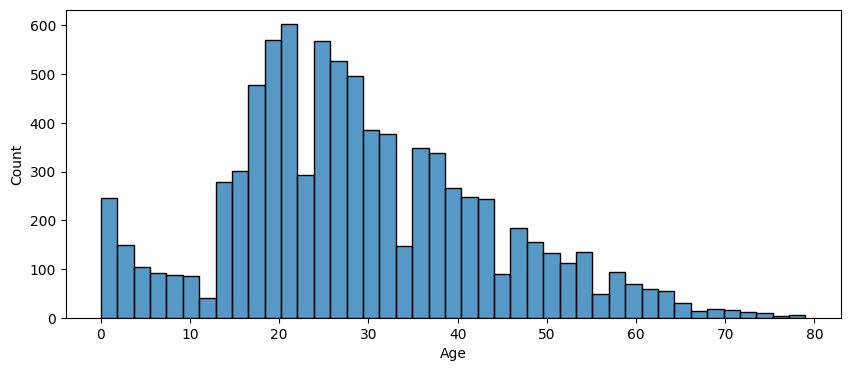

In [33]:
plt.figure(figsize=(10,4))
sns.histplot(df,x='Age',palette='viridis')

In [46]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['RoomService'].fillna(df['RoomService'].mean(),inplace=True)
df['FoodCourt'].fillna(df['FoodCourt'].mean(),inplace=True)
df['ShoppingMall'].fillna(df['ShoppingMall'].mean(),inplace=True)
df['Spa'].fillna(df['Spa'].mean(),inplace=True)
df['VRDeck'].fillna(df['VRDeck'].mean(),inplace=True)

In [89]:
cf['Age'].fillna(cf['Age'].mean(),inplace=True)
cf['RoomService'].fillna(cf['RoomService'].mean(),inplace=True)
cf['FoodCourt'].fillna(cf['FoodCourt'].mean(),inplace=True)
cf['ShoppingMall'].fillna(cf['ShoppingMall'].mean(),inplace=True)
cf['Spa'].fillna(cf['Spa'].mean(),inplace=True)
cf['VRDeck'].fillna(cf['VRDeck'].mean(),inplace=True)

<Axes: xlabel='Age', ylabel='Count'>

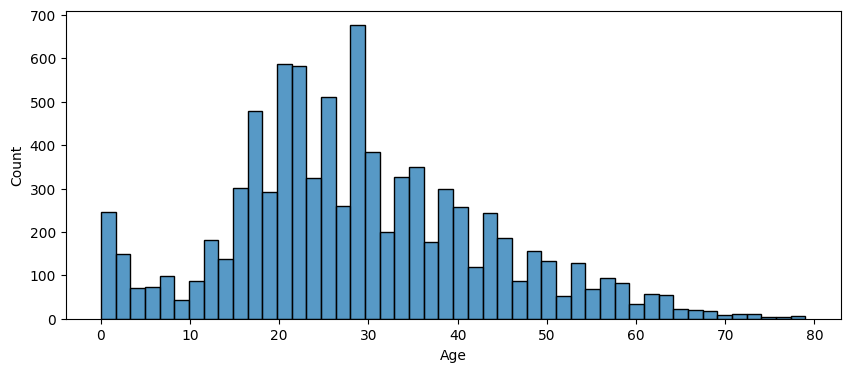

In [41]:
plt.figure(figsize=(10,4))
sns.histplot(df,x='Age',palette='viridis')

In [39]:
# Age RoomService	FoodCourt	ShoppingMall	Spa	VRDeck

<Figure size 1000x400 with 0 Axes>

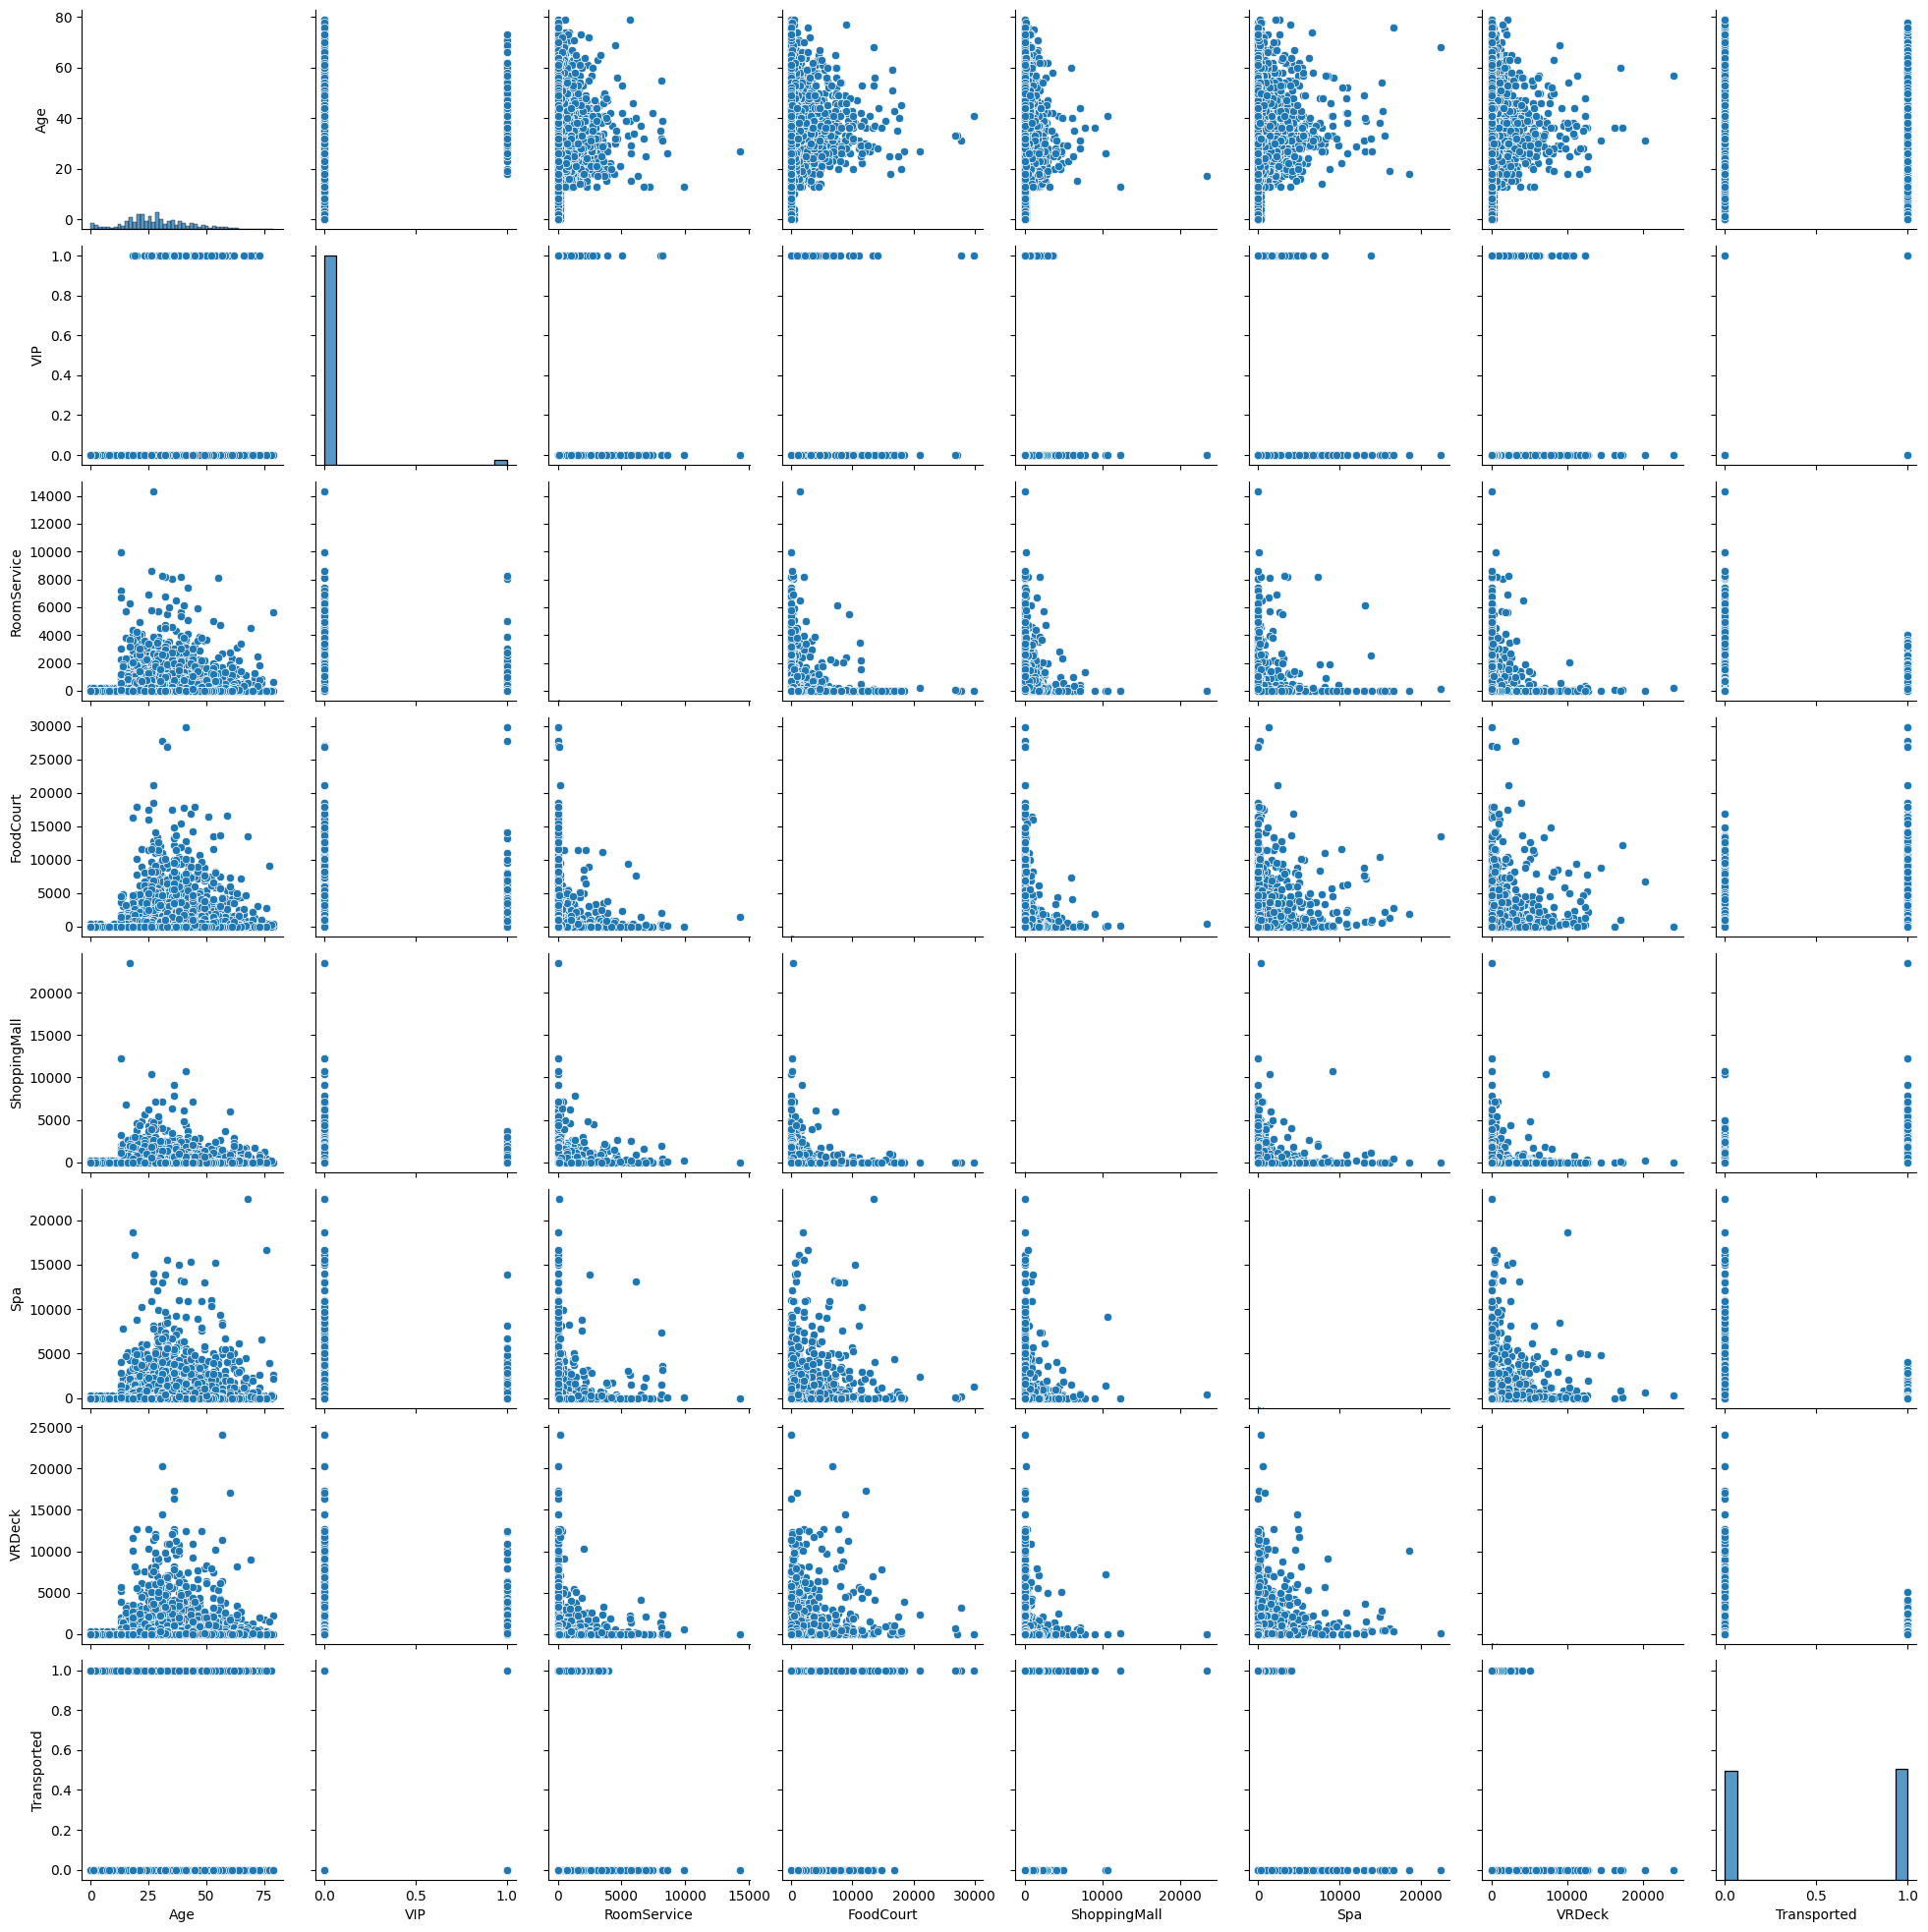

In [61]:
plt.figure(figsize=(10,4))
sns.pairplot(df)

**We don't really have any observable relationship in the dataset**

In [22]:
# numerical values
# Age RoomService	FoodCourt	ShoppingMall	Spa	VRDeck
# String Values
# HomePlanet	CryoSleep	Cabin	Destination

**Initial model training**

**Train a baseline model (no tuning, all features)**

In [98]:
X_base = df_encoded.drop(['Transported'],axis=1)
y_base = df_encoded['Transported']

In [99]:
from sklearn.tree import DecisionTreeClassifier

# Initialize with default parameters (baseline model)
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_base, y_base)

DecisionTreeClassifier(random_state=42)

In [100]:
# Predict target for test data
test_predictions = dt_model.predict(cf_encoded_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Cabin_A/1/P
- Cabin_A/105/S
- Cabin_A/108/S
- Cabin_A/109/S
- Cabin_A/11/P
- ...
Feature names seen at fit time, yet now missing:
- Cabin_A/0/P
- Cabin_A/0/S
- Cabin_A/1/S
- Cabin_A/10/P
- Cabin_A/10/S
- ...


**Feature Selection using Random Forest on training data**

Separate Numerical and Categorical Columns

In [63]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

Encode the categorical data

In [95]:
# One-hot encode training
df_filled_train= df.copy()
df_encoded = pd.get_dummies(df_filled_train, columns=categorical_cols)

In [97]:
# One-hot encode test data
cf_filled_test = cf.copy()
cf_encoded_test = pd.get_dummies(cf_filled_test, columns=categorical_cols)

In [72]:
X = df_encoded.drop('Transported',axis=1)
y = df_encoded['Transported']

In [76]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,criterion='gini',min_samples_split=30,n_jobs=-1)
model.fit(X,y)
feature_imp = model.feature_importances_
print(feature_imp)

[1.88664016e-02 5.10810714e-02 3.43353834e-02 ... 7.23757492e-09
 8.11764230e-06 1.04786503e-05]


In [77]:
# Sort and get top features
feature_importance = pd.Series(feature_imp, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(10)
print(top_features)

CryoSleep_True       0.060725
CryoSleep_False      0.057478
RoomService          0.051081
Spa                  0.046052
VRDeck               0.044952
FoodCourt            0.034335
ShoppingMall         0.024756
Age                  0.018866
HomePlanet_Europa    0.017632
HomePlanet_Earth     0.017339
dtype: float64


**Visualize Feature Importances**

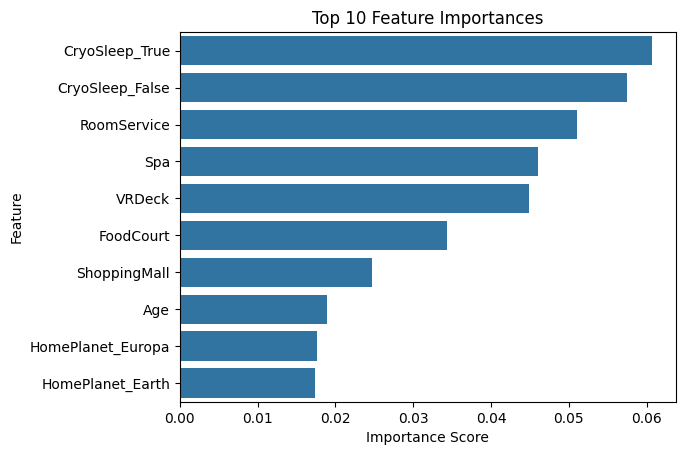

In [78]:
top_features = feature_importance.sort_values(ascending=False).head(10)
sns.barplot(x=top_features.values, y=top_features.index)
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()